In [1]:
from utils.classes import TennisMatchDataset
import numpy as np
import pandas as pd
import json
import os 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset, TensorDataset
import torch.optim as optim
from tqdm.notebook import tqdm
import torch 
from torch.utils.data import random_split
import utils.constants as c
import data.utils.constants as c2
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


MAX_PADDED = 45


In [2]:


tennis_dataset = TennisMatchDataset([   
                                        'past-french-open-atp-singles', 
                                        'past-australian-open-atp-singles',
                                        'past-rome-atp-singles', 
                                        'past-madrid-atp-singles',
                                        'past-monte-carlo-atp-singles',
                                        'past-lyon-atp-singles',
                                        'past-barcelona-atp-singles',
                                        'past-munich-atp-singles',
                                        'past-geneva-atp-singles',
                                        'past-estoril-atp-singles',
                                        'past-houston-atp-singles',
                                        'past-marrakech-atp-singles',
                                        'past-bucharest-atp-singles',
                                        'past-doha-atp-singles',
                                        'past-dubai-atp-singles',
                                        'past-indian-wells-atp-singles',
                                        'past-miami-atp-singles',
                                        'past-acapulco-atp-singles',
                                        'past-rio-de-janeiro-atp-singles',
                                        'past-santiago-atp-singles',
                                        'past-brisbane-atp-singles',
                                        'past-hong-kong-atp-singles',
                                        'past-auckland-atp-singles',
                                        'past-adelaide-atp-singles',
                                        'past-montpellier-atp-singles',
                                        'past-marseille-atp-singles',
                                        'past-cordoba-atp-singles',
                                        'past-dallas-atp-singles',
                                        'past-french-open-2023-atp-singles',
                                        'past-australian-open-2023-atp-singles',
                                        'past-rome-2023-atp-singles',
                                        'past-madrid-2023-atp-singles',
                                        'past-monte-carlo-2023-atp-singles',
                                        'past-lyon-2023-atp-singles',
                                        'past-barcelona-2023-atp-singles',
                                        'past-munich-2023-atp-singles',
                                        'past-geneva-2023-atp-singles',
                                        'past-estoril-2023-atp-singles',
                                        'past-houston-2023-atp-singles',
                                        'past-marrakech-2023-atp-singles', 
                                        # 'past-bucharest-2023-atp-singles', ###
                                        'past-doha-2023-atp-singles',
                                        'past-dubai-2023-atp-singles',
                                        'past-indian-wells-2023-atp-singles',
                                        'past-miami-2023-atp-singles',
                                        'past-acapulco-2023-atp-singles',
                                        'past-rio-de-janeiro-2023-atp-singles',
                                        'past-santiago-2023-atp-singles',
                                        'past-auckland-2023-atp-singles',
                                        'past-adelaide-2023-atp-singles',
                                        'past-montpellier-2023-atp-singles',
                                        'past-marseille-2023-atp-singles',
                                        'past-cordoba-2023-atp-singles',
                                        'past-dallas-2023-atp-singles',
                                        'past-stuttgart-2023-atp-singles',
                                        'past-hertogenbosch-2023-atp-singles',
                                        'past-halle-2023-atp-singles',
                                        'past-london-2023-atp-singles',
                                        'past-mallorca-2023-atp-singles',
                                        'past-eastbourne-2023-atp-singles',
                                        'past-wimbledon-2023-atp-singles',
                                        'past-hamburg-2023-atp-singles',
                                          'past-bastad-2023-atp-singles',
                                          'past-gstaad-2023-atp-singles', ###
                                          'past-newport-2023-atp-singles',
                                          'past-umag-2023-atp-singles',
                                          'past-atlanta-2023-atp-singles',
                                          'past-washington-2023-atp-singles',
                                          # 'past-montreal-2023-atp-singles', ###
                                          'past-cincinnati-2023-atp-singles',
                                          'past-winston-salem-2023-atp-singles',
                                          'past-us-open-2023-atp-singles', ###
                                          'past-chengdu-2023-atp-singles',
                                          'past-zhuhai-2023-atp-singles', ###
                                          'past-tokyo-2023-atp-singles',
                                          'past-beijing-2023-atp-singles', ###
                                          'past-shanghai-2023-atp-singles',
                                          'past-stockholm-2023-atp-singles',
                                          'past-antwerp-2023-atp-singles', ###
                                          # 'past-almaty-2023-atp-singles', ###
                                          'past-vienna-2023-atp-singles',
                                          'past-basel-2023-atp-singles',
                                          'past-paris-2023-atp-singles',
                                          'past-metz-2023-atp-singles',
                                          'past-finals-turin-2023-atp-singles',
                                     ])

Loading data for tournaments {'past-winston-salem-2023-atp-singles', 'past-estoril-atp-singles', 'past-lyon-atp-singles', 'past-stockholm-2023-atp-singles', 'past-eastbourne-2023-atp-singles', 'past-santiago-atp-singles', 'past-cordoba-atp-singles', 'past-rome-2023-atp-singles', 'past-acapulco-2023-atp-singles', 'past-wimbledon-2023-atp-singles', 'past-atlanta-2023-atp-singles', 'past-houston-2023-atp-singles', 'past-auckland-2023-atp-singles', 'past-adelaide-atp-singles', 'past-bastad-2023-atp-singles', 'past-marseille-2023-atp-singles', 'past-rio-de-janeiro-atp-singles', 'past-brisbane-atp-singles', 'past-chengdu-2023-atp-singles', 'past-barcelona-2023-atp-singles', 'past-munich-atp-singles', 'past-madrid-2023-atp-singles', 'past-miami-atp-singles', 'past-barcelona-atp-singles', 'past-paris-2023-atp-singles', 'past-dallas-2023-atp-singles', 'past-marrakech-atp-singles', 'past-cincinnati-2023-atp-singles', 'past-bucharest-atp-singles', 'past-london-2023-atp-singles', 'past-mallorca-20

In [3]:
# nb_errors = 0
# list_vectors = []
# list_labels = []
# for match_id in tqdm(tennis_dataset.get_matches_ids()):
#     nb_try = 0
#     while nb_try < 3:
#         try :
#             vector = tennis_dataset.get_match(match_id).get_feature_vector()
#             list_vectors.append(vector)
#             label = tennis_dataset.get_match(match_id).get_label()
#             list_labels.append(label)
#             break
#         except Exception as e:
#             nb_try += 1
#             if nb_try == 3 :
#                 tqdm.write(f"error : {e} for match_id : {match_id} opposing {tennis_dataset.get_match(match_id).get_players()[0]} to {tennis_dataset.get_match(match_id).get_players()[1]}")
#                 nb_errors += 1
    
    
# tqdm.write(f'Number of errors : {nb_errors} over {len(tennis_dataset.get_matches_ids())} matches')

list_vectors, list_labels, lst_match_id, nb_errors = tennis_dataset.get_past_vectors()

tqdm.write(f'Number of errors : {nb_errors}')


Error 'j0dg' for match zyWg468I in tournament past-winston-salem-2023-atp-singles
Error 'j0dg' for match 4tRKU3fl in tournament past-winston-salem-2023-atp-singles
Error 'j0dg' for match 0xzjGhN6 in tournament past-winston-salem-2023-atp-singles
Error 'kb54' for match xjBPMt0m in tournament past-winston-salem-2023-atp-singles
Error 'g0a0' for match vmVSGVCO in tournament past-winston-salem-2023-atp-singles
Error 'kc86' for match 6s3hGq4N in tournament past-winston-salem-2023-atp-singles
Error 'j0dg' for match 0xIWdnSi in tournament past-winston-salem-2023-atp-singles
Error 'g0a0' for match MoJScSCo in tournament past-winston-salem-2023-atp-singles
Error 'kc86' for match 82Xh5ytG in tournament past-winston-salem-2023-atp-singles
Error 'kb54' for match YJosjImI in tournament past-winston-salem-2023-atp-singles
Error 'kb54' for match G8d1s7S4 in tournament past-winston-salem-2023-atp-singles
Error 'kc86' for match AgEuQ5cU in tournament past-winston-salem-2023-atp-singles
Error 'c0jt' for

Error 'l0ee' for match rBjlQXzO in tournament past-eastbourne-2023-atp-singles
Error 'g0a0' for match hMcyTZj5 in tournament past-eastbourne-2023-atp-singles
Error 'j0dg' for match Me2uSg6B in tournament past-eastbourne-2023-atp-singles
Error 'j0dg' for match 0xh6ulma in tournament past-santiago-atp-singles
Error 'm0tb' for match 8GEs4cjC in tournament past-santiago-atp-singles
Error 'm0tb' for match t8cUabps in tournament past-santiago-atp-singles
Error 'j0dg' for match ALp2rs7O in tournament past-santiago-atp-singles
Error 'j0dg' for match W08dk8WL in tournament past-santiago-atp-singles
Error 'm0tu' for match 8lUkVXMa in tournament past-santiago-atp-singles
Error 'j0dg' for match 0bNYMEjs in tournament past-santiago-atp-singles
Error 'm0tu' for match Iw2r2ZsR in tournament past-santiago-atp-singles
Error 'm0tb' for match EX1Eujsq in tournament past-cordoba-atp-singles
Error 'm0tb' for match fPAYvim3 in tournament past-cordoba-atp-singles
Error 'g0dl' for match nZD6zZDR in tournament

  6%|▌         | 5/82 [00:00<00:01, 41.63it/s]

Error 'g0a0' for match tGuGb7FA in tournament past-rome-2023-atp-singles
Error 'j0dg' for match W6eQu5A4 in tournament past-rome-2023-atp-singles
Error 'kb05' for match IuTRWcQ0 in tournament past-rome-2023-atp-singles
Error 'j0dg' for match 46A3qjSd in tournament past-rome-2023-atp-singles
Error 'j0dg' for match 4flni9f2 in tournament past-rome-2023-atp-singles
Error 'o507' for match Shu31gI9 in tournament past-rome-2023-atp-singles
Error 'f0cj' for match EkFTnf3G in tournament past-rome-2023-atp-singles
Error 'l397' for match hSIM2woc in tournament past-acapulco-2023-atp-singles
Error 'ga36' for match WhYr5FG7 in tournament past-acapulco-2023-atp-singles
Error 'l397' for match KEEwRdwR in tournament past-acapulco-2023-atp-singles
Error 'sf89' for match fN3Y1Wio in tournament past-acapulco-2023-atp-singles
Error 'sf89' for match EPqaA3BF in tournament past-acapulco-2023-atp-singles
Error 'j0dg' for match tCoiCPt3 in tournament past-acapulco-2023-atp-singles
Error 'ka98' for match 8Q1X

 12%|█▏        | 10/82 [00:00<00:02, 24.82it/s]

Error 't0hs' for match jRO4Mthc in tournament past-wimbledon-2023-atp-singles
Error 'ch27' for match CdFyKYD8 in tournament past-wimbledon-2023-atp-singles
Error 'm0on' for match Cb8YkzLe in tournament past-wimbledon-2023-atp-singles
Error 'c882' for match IeTgg9Rm in tournament past-wimbledon-2023-atp-singles
Error 'gb93' for match Cj8EhjG2 in tournament past-wimbledon-2023-atp-singles
Error 'ga36' for match UDoKVq3i in tournament past-wimbledon-2023-atp-singles
Error 'g0kv' for match OCIcErYG in tournament past-wimbledon-2023-atp-singles
Error 'n663' for match UelddO22 in tournament past-wimbledon-2023-atp-singles
Error 't0hs' for match plthvVPJ in tournament past-wimbledon-2023-atp-singles
Error 'p0me' for match SlFmbPGh in tournament past-wimbledon-2023-atp-singles
Error 'ch27' for match rk5J6j4l in tournament past-wimbledon-2023-atp-singles
Error 'ga36' for match tbtVur1O in tournament past-wimbledon-2023-atp-singles
Error 'cb14' for match YDEuVQn6 in tournament past-wimbledon-202

 12%|█▏        | 10/82 [00:00<00:02, 24.82it/s]

Error 'l0id' for match v5v6nXff in tournament past-houston-2023-atp-singles
Error 'ga36' for match M3SkhWoA in tournament past-houston-2023-atp-singles
Error 'j0dg' for match WbTQq8gj in tournament past-houston-2023-atp-singles
Error 'v306' for match n7BD7Boc in tournament past-houston-2023-atp-singles
Error 'd0c3' for match 4QSxCQxq in tournament past-houston-2023-atp-singles
Error 'b0lx' for match ARw8SvcU in tournament past-auckland-2023-atp-singles
Error 'b0lx' for match 4hBAhYri in tournament past-auckland-2023-atp-singles
Error 'b0lx' for match tnMsO9Gg in tournament past-auckland-2023-atp-singles
Error 'b0lx' for match KzOtBzYq in tournament past-auckland-2023-atp-singles
Error 'r0dc' for match EgJpyv5l in tournament past-auckland-2023-atp-singles
Error 'r0dc' for match b9kUGqIT in tournament past-auckland-2023-atp-singles
Error 'p0j3' for match ELPwym3o in tournament past-auckland-2023-atp-singles
Error 'ch90' for match d4HfX42A in tournament past-auckland-2023-atp-singles
Erro

 18%|█▊        | 15/82 [00:00<00:02, 26.04it/s]

Error 'j0dg' for match 2LYXMqxT in tournament past-bastad-2023-atp-singles
Error 'g0kv' for match 4UKaI3pp in tournament past-bastad-2023-atp-singles
Error 'd0i5' for match KMhHAlqT in tournament past-bastad-2023-atp-singles
Error 'c882' for match 8Ucheze1 in tournament past-marseille-2023-atp-singles
Error 'g0a0' for match z7UCUcN1 in tournament past-marseille-2023-atp-singles
Error 'kb05' for match EcTGTHx8 in tournament past-marseille-2023-atp-singles
Error 'j0dg' for match KjEMxzH3 in tournament past-rio-de-janeiro-atp-singles
Error 'j0dg' for match hCxWoCBg in tournament past-rio-de-janeiro-atp-singles
Error 'v09t' for match SUUrqAeC in tournament past-rio-de-janeiro-atp-singles
Error 'm0tb' for match ERQvpjt6 in tournament past-rio-de-janeiro-atp-singles


 24%|██▍       | 20/82 [00:00<00:02, 30.77it/s]

Error 'kb54' for match beGbbuUM in tournament past-brisbane-atp-singles
Error 'b0ot' for match GWnPE0E3 in tournament past-brisbane-atp-singles
Error 'sf89' for match tK9Iv5gB in tournament past-chengdu-2023-atp-singles
Error 'x01a' for match W82Vy3wU in tournament past-chengdu-2023-atp-singles
Error 'l0k2' for match dW76s79h in tournament past-chengdu-2023-atp-singles
Error 'ga36' for match rLuOo5TP in tournament past-barcelona-2023-atp-singles
Error 'l397' for match 2gbm9RZI in tournament past-barcelona-2023-atp-singles
Error 'ga36' for match tvW9QS4g in tournament past-barcelona-2023-atp-singles
Error 'v306' for match O2aqA7KC in tournament past-barcelona-2023-atp-singles
Error 'c882' for match j9iVXACJ in tournament past-barcelona-2023-atp-singles
Error 'bd80' for match UajZWURP in tournament past-barcelona-2023-atp-singles
Error 'm0ey' for match xGWR1FiC in tournament past-barcelona-2023-atp-singles
Error 'z246' for match WG6Ffv6C in tournament past-barcelona-2023-atp-singles
Erro

 24%|██▍       | 20/82 [00:00<00:02, 30.77it/s]

Error 'bd80' for match OAVG07G8 in tournament past-madrid-2023-atp-singles
Error 'm0c2' for match ELRtTeAj in tournament past-miami-atp-singles
Error 'm0c2' for match ELwp144T in tournament past-miami-atp-singles
Error 'm0c2' for match AmHMYpQ3 in tournament past-miami-atp-singles
Error 'b0no' for match O8W0ZHGE in tournament past-miami-atp-singles
Error 's0ja' for match GpzmREzh in tournament past-miami-atp-singles


Error 's0uv' for match A9CnbG65 in tournament past-miami-atp-singles
Error 'a09u' for match ILzioZ34 in tournament past-barcelona-atp-singles
Error 'a0ea' for match ULVWyVQj in tournament past-barcelona-atp-singles
Error 'ga36' for match lUCFdl5P in tournament past-dallas-2023-atp-singles
Error 'l0id' for match 4bnhqx3c in tournament past-dallas-2023-atp-singles
Error 'ga36' for match tW9RO6qI in tournament past-dallas-2023-atp-singles
Error 'ga36' for match x2RNCsvA in tournament past-dallas-2023-atp-singles
Error 'ch90' for match 4tkwndKD in tournament past-dallas-2023-atp-singles
Error 'v306' for match pQLzVWdO in tournament past-dallas-2023-atp-singles
Error 'rg42' for match OGKvUjCU in tournament past-dallas-2023-atp-singles
Error 'l0id' for match hr3ndtrL in tournament past-dallas-2023-atp-singles
Error 'v306' for match 2Revcp4T in tournament past-dallas-2023-atp-singles
Error 'e811' for match SItjErvS in tournament past-dallas-2023-atp-singles
Error 'ha71' for match hv3PDzCN in 

 34%|███▍      | 28/82 [00:01<00:01, 29.96it/s]

Error 'g0a0' for match lWo8Qfpf in tournament past-cincinnati-2023-atp-singles
Error 'g0a0' for match S6tDSfvh in tournament past-cincinnati-2023-atp-singles
Error 'pl80' for match 6VCWfDCi in tournament past-bucharest-atp-singles
Error 'ca12' for match 88E7hCT5 in tournament past-london-2023-atp-singles
Error 'l397' for match ngQbfYbg in tournament past-london-2023-atp-singles
Error 'l397' for match d24T6JUH in tournament past-mallorca-2023-atp-singles
Error 'l397' for match YiNcHJVK in tournament past-mallorca-2023-atp-singles
Error 'l397' for match nP6SGOQM in tournament past-mallorca-2023-atp-singles
Error 'v306' for match ripAUDVn in tournament past-mallorca-2023-atp-singles


 39%|███▉      | 32/82 [00:01<00:01, 31.55it/s]

Error 'b0no' for match 02V9ZiLk in tournament past-madrid-atp-singles
Error 'm0tb' for match GzFn1bFN in tournament past-madrid-atp-singles
Error 'o09a' for match ImVCD7bf in tournament past-madrid-atp-singles
Error 'm0tb' for match zogxwqq3 in tournament past-madrid-atp-singles
Error 'n0be' for match vRB61kGr in tournament past-dallas-atp-singles
Error 't0hs' for match ptG1ioBO in tournament past-dallas-atp-singles
Error 's0vm' for match Qw00g7tC in tournament past-dallas-atp-singles
Error 'c0jt' for match KjM7mxmJ in tournament past-adelaide-2023-atp-singles
Error 'cd85' for match GI9RSKwB in tournament past-adelaide-2023-atp-singles
Error 'g0a0' for match xUD2pVnN in tournament past-adelaide-2023-atp-singles
Error 'mh30' for match dCyrgtJs in tournament past-adelaide-2023-atp-singles
Error 'g0a0' for match 69mBFVsJ in tournament past-adelaide-2023-atp-singles
Error 'c0jt' for match hrRzUjjT in tournament past-adelaide-2023-atp-singles
Error 'mh30' for match GdxzkwL9 in tournament pa

 45%|████▌     | 37/82 [00:01<00:01, 36.06it/s]

Error 'o659' for match fBkyM5g4 in tournament past-stuttgart-2023-atp-singles
Error 'pf36' for match 2iqJAo3i in tournament past-doha-atp-singles
Error 'cd85' for match SM4YT5as in tournament past-french-open-atp-singles
Error 'm0tb' for match p2JTgv1D in tournament past-french-open-atp-singles
Error 'j0dg' for match 4tJwZg1k in tournament past-french-open-atp-singles


 50%|█████     | 41/82 [00:01<00:01, 31.12it/s]

Error 'kb05' for match dp3msuhI in tournament past-french-open-atp-singles
Error 'm0tu' for match MkH6A105 in tournament past-french-open-atp-singles
Error 'f0ho' for match K0mZFWeR in tournament past-french-open-atp-singles
Error 'm0c2' for match KCqKfsbD in tournament past-houston-atp-singles
Error 'rg42' for match dUS2JQzE in tournament past-houston-atp-singles
Error 'l0id' for match juKrx2rH in tournament past-indian-wells-2023-atp-singles
Error 'l0id' for match rydfWdCL in tournament past-indian-wells-2023-atp-singles
Error 'g0a0' for match x4z0CyLk in tournament past-indian-wells-2023-atp-singles
Error 'kb05' for match dKgrZbS2 in tournament past-indian-wells-2023-atp-singles
Error 'c882' for match dfxBcO2b in tournament past-indian-wells-2023-atp-singles
Error 'b0oy' for match MRvrzfVn in tournament past-indian-wells-2023-atp-singles
Error 'c882' for match nk6BRFdC in tournament past-indian-wells-2023-atp-singles
Error 'ga36' for match KxFfVccm in tournament past-indian-wells-20

 50%|█████     | 41/82 [00:01<00:01, 31.12it/s]

Error 'l0ip' for match A3JXyz3k in tournament past-auckland-atp-singles
Error 's0w8' for match dxBBWvR9 in tournament past-auckland-atp-singles
Error 'l0ip' for match hxGoE2z2 in tournament past-auckland-atp-singles
Error 'kg53' for match GAVSpGTT in tournament past-auckland-atp-singles
Error 'b0hy' for match Iwt2dxE7 in tournament past-auckland-atp-singles
Error 'dc38' for match 8QDZKDiH in tournament past-auckland-atp-singles
Error 'm0bw' for match lOs0AH0g in tournament past-zhuhai-2023-atp-singles
Error 'z0cq' for match SEt49yGa in tournament past-zhuhai-2023-atp-singles
Error 'l733' for match zH1PGJNP in tournament past-zhuhai-2023-atp-singles
Error 'wb36' for match bZSHcvHm in tournament past-zhuhai-2023-atp-singles
Error 'sq79' for match Sn6pGnXE in tournament past-zhuhai-2023-atp-singles
Error 'kb05' for match ppbAEIJG in tournament past-monte-carlo-2023-atp-singles
Error 'g0a0' for match xfJqkmIS in tournament past-monte-carlo-2023-atp-singles
Error 'kb05' for match IovYq5Kn i

 56%|█████▌    | 46/82 [00:01<00:01, 29.22it/s]

Error 'lf29' for match OG8zcwph in tournament past-lyon-2023-atp-singles
Error 'lf29' for match dKVJr8VI in tournament past-lyon-2023-atp-singles
Error 'lf29' for match ADUBY9So in tournament past-lyon-2023-atp-singles
Error 'g0a0' for match AVoR4TAs in tournament past-hertogenbosch-2023-atp-singles
Error 'g0a0' for match dOHN0qx9 in tournament past-hertogenbosch-2023-atp-singles
Error 'ld26' for match 0K0fBYfH in tournament past-hertogenbosch-2023-atp-singles
Error 'c0jt' for match xhjypiPk in tournament past-hertogenbosch-2023-atp-singles
Error 'ld26' for match QDWV5Yo9 in tournament past-hertogenbosch-2023-atp-singles
Error 'dc83' for match KGutqBvd in tournament past-hertogenbosch-2023-atp-singles
Error 'd0d2' for match nNXR6EW2 in tournament past-hertogenbosch-2023-atp-singles
Error 'l0fv' for match nolBXzFh in tournament past-hertogenbosch-2023-atp-singles
Error 'rh88' for match foC1GUZO in tournament past-acapulco-atp-singles


 56%|█████▌    | 46/82 [00:01<00:01, 29.22it/s]

Error 'd0c3' for match 48uC8Mw2 in tournament past-indian-wells-atp-singles
Error 'd0c3' for match MR8lpva5 in tournament past-indian-wells-atp-singles
Error 'w0dw' for match KvQx7AK1 in tournament past-indian-wells-atp-singles
Error 'd0c3' for match xdSllRqe in tournament past-indian-wells-atp-singles
Error 'd0d4' for match nVT0FYCL in tournament past-indian-wells-atp-singles
Error 'c977' for match prLzS6cc in tournament past-australian-open-atp-singles
Error 'mh30' for match zu4mFqQS in tournament past-australian-open-atp-singles
Error 'g0a0' for match KrMuGvTC in tournament past-australian-open-atp-singles
Error 'w0c4' for match C0eFA3Yq in tournament past-australian-open-atp-singles
Error 'g0a0' for match 8ld0Azzr in tournament past-australian-open-atp-singles
Error 'kc29' for match IqDiVGfA in tournament past-australian-open-atp-singles
Error 'w0c4' for match Sh9PXUX5 in tournament past-australian-open-atp-singles
Error 'mh30' for match WngktgQP in tournament past-australian-open-

 61%|██████    | 50/82 [00:01<00:01, 26.02it/s]

Error 'c882' for match SIvLzXmm in tournament past-australian-open-atp-singles
Error 'm0tb' for match b5BkvQFl in tournament past-rome-atp-singles
Error 'a678' for match UaOyqDVr in tournament past-washington-2023-atp-singles
Error 'f811' for match xWQUB7a1 in tournament past-washington-2023-atp-singles


 65%|██████▍   | 53/82 [00:01<00:01, 25.96it/s]

Error 'ka98' for match t4XLDTUl in tournament past-washington-2023-atp-singles
Error 'ga36' for match KfWPCmpe in tournament past-washington-2023-atp-singles
Error 'f811' for match 6y2PSBh7 in tournament past-washington-2023-atp-singles
Error 'sz28' for match vPtyIHXc in tournament past-washington-2023-atp-singles
Error 'ka98' for match hWYN7Ii0 in tournament past-washington-2023-atp-singles
Error 'f811' for match 25f9WUMG in tournament past-washington-2023-atp-singles
Error 'bp44' for match Myd7C9Vp in tournament past-washington-2023-atp-singles
Error 'v0h9' for match YovTnj7c in tournament past-washington-2023-atp-singles
Error 'f0ck' for match feuPmWii in tournament past-washington-2023-atp-singles
Error 'v09t' for match OEe5XA7A in tournament past-washington-2023-atp-singles
Error 'ka98' for match pUqEVlxN in tournament past-washington-2023-atp-singles
Error 'y124' for match f3ZmPnFj in tournament past-washington-2023-atp-singles
Error 'h940' for match zupkyg8o in tournament past-w

 72%|███████▏  | 59/82 [00:02<00:00, 32.70it/s]

Error 'g0a0' for match 4ItqtMFo in tournament past-basel-2023-atp-singles
Error 'b0lw' for match INyPzRw6 in tournament past-basel-2023-atp-singles
Error 't0hs' for match rmhbGCmf in tournament past-geneva-atp-singles
Error 'j09f' for match MiOtsy3e in tournament past-geneva-atp-singles
Error 't0hs' for match Odtfjut9 in tournament past-geneva-atp-singles
Error 's483' for match MVj0W5n6 in tournament past-estoril-2023-atp-singles
Error 'ch90' for match zZdiOYmk in tournament past-estoril-2023-atp-singles
Error 's483' for match 0dIpBJlC in tournament past-estoril-2023-atp-singles
Error 's483' for match 4ISXadem in tournament past-estoril-2023-atp-singles
Error 'c0jt' for match YquGsFuJ in tournament past-estoril-2023-atp-singles
Error 'z0cq' for match MsJW9vvU in tournament past-beijing-2023-atp-singles
Error 'l0fw' for match O4EGoCqH in tournament past-beijing-2023-atp-singles
Error 'p0j3' for match KxVMiJLG in tournament past-dubai-2023-atp-singles


 78%|███████▊  | 64/82 [00:02<00:00, 35.14it/s]

Error 'kb05' for match 2gbBbFVn in tournament past-dubai-2023-atp-singles
Error 'c0mv' for match pxIv4y8P in tournament past-dubai-2023-atp-singles
Error 'g0a0' for match IkhvhVEU in tournament past-dubai-2023-atp-singles
Error 'p0j3' for match CtFpP9F7 in tournament past-dubai-2023-atp-singles
Error 'ag60' for match 8bexAzw0 in tournament past-dubai-2023-atp-singles
Error 'p0j3' for match zTR6PFxm in tournament past-dubai-2023-atp-singles
Error 's0ki' for match bmlk7YMI in tournament past-dubai-2023-atp-singles
Error 'g0a0' for match AoIlpxCB in tournament past-miami-2023-atp-singles
Error 'g0a0' for match 2icKoF8D in tournament past-miami-2023-atp-singles
Error 'm0c2' for match juYFz3jq in tournament past-miami-2023-atp-singles
Error 'ga36' for match xdWNYtLe in tournament past-miami-2023-atp-singles
Error 'ka98' for match ATvDwW6N in tournament past-miami-2023-atp-singles
Error 'g0a0' for match ClHJbEzs in tournament past-montpellier-2023-atp-singles
Error 'kb05' for match xnoi3O26 

 78%|███████▊  | 64/82 [00:02<00:00, 35.14it/s]

Error 'bd80' for match 2J3ZZeRi in tournament past-us-open-2023-atp-singles
Error 'j0dg' for match Eg9M8Ypq in tournament past-us-open-2023-atp-singles
Error 's0ja' for match CIMqBSLE in tournament past-us-open-2023-atp-singles
Error 'm0tb' for match U3fY37FO in tournament past-us-open-2023-atp-singles
Error 'pd07' for match Qig5qeoj in tournament past-us-open-2023-atp-singles
Error 'a678' for match YFgVH5go in tournament past-us-open-2023-atp-singles
Error 'mh30' for match nLWXvyNG in tournament past-us-open-2023-atp-singles
Error 's0ja' for match pnws78Oa in tournament past-us-open-2023-atp-singles
Error 'm0tb' for match p8Ajl6b7 in tournament past-us-open-2023-atp-singles
Error 'd0c3' for match W0hFLNpU in tournament past-us-open-2023-atp-singles
Error 'm0c2' for match tAzhhGx6 in tournament past-us-open-2023-atp-singles
Error 'z0bz' for match tQCtBct1 in tournament past-us-open-2023-atp-singles
Error 's0ja' for match vkQTsqA3 in tournament past-us-open-2023-atp-singles
Error 'mh30'

 83%|████████▎ | 68/82 [00:02<00:00, 30.64it/s]

Error 'a678' for match p8hKyAra in tournament past-newport-2023-atp-singles
Error 'a678' for match lGRmmWCj in tournament past-newport-2023-atp-singles
Error 'ch90' for match MokCk17F in tournament past-newport-2023-atp-singles
Error 'a678' for match f7Xm6rBQ in tournament past-newport-2023-atp-singles
Error 's0ja' for match pxjcqL3D in tournament past-newport-2023-atp-singles
Error 'ch90' for match lzp1NOqj in tournament past-newport-2023-atp-singles
Error 'z09k' for match OCfu8YGf in tournament past-newport-2023-atp-singles
Error 'bp44' for match fwjy9E1l in tournament past-newport-2023-atp-singles
Error 'lh86' for match WziySg8Q in tournament past-newport-2023-atp-singles
Error 'y124' for match 23gq7hW0 in tournament past-newport-2023-atp-singles
Error 'v09t' for match t60fPLDt in tournament past-rio-de-janeiro-2023-atp-singles
Error 'j0dg' for match beWL18hb in tournament past-rio-de-janeiro-2023-atp-singles
Error 'j0dg' for match 6irdkFW9 in tournament past-rio-de-janeiro-2023-atp

 90%|█████████ | 74/82 [00:02<00:00, 33.09it/s]

Error 'pd07' for match hlpsiC1T in tournament past-dubai-atp-singles
Error 'ch90' for match ELRW4o8f in tournament past-shanghai-2023-atp-singles
Error 'ch90' for match UaEfqD7o in tournament past-shanghai-2023-atp-singles
Error 'ch90' for match CpJnTzJ2 in tournament past-shanghai-2023-atp-singles
Error 'd0c3' for match GI1VKCQr in tournament past-shanghai-2023-atp-singles
Error 'k0ci' for match h6uC6QWM in tournament past-shanghai-2023-atp-singles
Error 'z246' for match dvn38n2A in tournament past-shanghai-2023-atp-singles
Error 'z0cq' for match SbfnCU2o in tournament past-shanghai-2023-atp-singles
Error 'sq79' for match SvW4aiJu in tournament past-shanghai-2023-atp-singles
Error 'x01a' for match lEreA8Xc in tournament past-shanghai-2023-atp-singles
Error 'l0fw' for match CSXGdk3b in tournament past-shanghai-2023-atp-singles
Error 'd0c3' for match nNqo0O9j in tournament past-shanghai-2023-atp-singles
Error 'ch90' for match zqQuM5W9 in tournament past-shanghai-2023-atp-singles


 90%|█████████ | 74/82 [00:02<00:00, 33.09it/s]

Error 'm0c2' for match Ea8H7vIs in tournament past-marseille-atp-singles
Error 'm0c2' for match E5731zbh in tournament past-marseille-atp-singles


 95%|█████████▌| 78/82 [00:02<00:00, 25.83it/s]

Error 'b0lx' for match SxwKqO2c in tournament past-australian-open-2023-atp-singles
Error 'cd85' for match 0v1XTN0D in tournament past-australian-open-2023-atp-singles
Error 'b0lx' for match lEhbNBU5 in tournament past-australian-open-2023-atp-singles
Error 'ca12' for match Mm2TU3o7 in tournament past-australian-open-2023-atp-singles
Error 'mh30' for match 4IjcXngU in tournament past-australian-open-2023-atp-singles
Error 'ch90' for match jVvR1pD9 in tournament past-australian-open-2023-atp-singles
Error 'b0lx' for match zeMB9YAm in tournament past-australian-open-2023-atp-singles
Error 'kb05' for match WKOimobG in tournament past-australian-open-2023-atp-singles
Error 'cd85' for match 4YMaoPSS in tournament past-australian-open-2023-atp-singles
Error 'ca12' for match d8cMX5bT in tournament past-australian-open-2023-atp-singles
Error 'pd07' for match zLVpYEhC in tournament past-australian-open-2023-atp-singles
Error 'mh30' for match zJdVIrm8 in tournament past-australian-open-2023-atp-

 95%|█████████▌| 78/82 [00:02<00:00, 25.83it/s]

Error 'm0tb' for match AiHXv46S in tournament past-french-open-2023-atp-singles


100%|██████████| 82/82 [00:02<00:00, 28.83it/s]


Error 'kb05' for match WlhFfhNp in tournament past-french-open-2023-atp-singles
Error 'g0a0' for match hxCjTCT9 in tournament past-french-open-2023-atp-singles
Error 'm0tb' for match G4nCAKp6 in tournament past-french-open-2023-atp-singles
Error 'm0tb' for match 88WOtzz5 in tournament past-french-open-2023-atp-singles
Error 't0hs' for match MFtGiABs in tournament past-french-open-2023-atp-singles
Error 'ch90' for match 8rN3Pz5E in tournament past-french-open-2023-atp-singles
Error 'gb93' for match dQOEtmVq in tournament past-french-open-2023-atp-singles
Error 'j0dg' for match K4XnoTMS in tournament past-french-open-2023-atp-singles
Error 'm0tb' for match Ui6Cygqd in tournament past-french-open-2023-atp-singles
Error 'l949' for match 8Cbeonpm in tournament past-french-open-2023-atp-singles
Error 't0hs' for match zPkCs4qC in tournament past-french-open-2023-atp-singles
Error 'kc29' for match plt2DJVO in tournament past-french-open-2023-atp-singles
Error 'n663' for match 6TudSCMA in tourn

In [4]:
tqdm.write(f'Number of vectors : {len(list_vectors)}')
input_shapes = []
for i in range(len(list_vectors[0])):
    tqdm.write(f'Input number {i} is shape : {len(list_vectors[0][i])}')
    input_shapes.append(len(list_vectors[0][i]))
tqdm.write(f'Input shapes : {input_shapes}')

Number of vectors : 4960
Input number 0 is shape : 2
Input number 1 is shape : 40
Input number 2 is shape : 40
Input number 3 is shape : 4
Input number 4 is shape : 4
Input number 5 is shape : 15
Input number 6 is shape : 15
Input shapes : [2, 40, 40, 4, 4, 15, 15]


In [5]:
# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors 
new_list_vectors = []
new_list_labels = []
for i in tqdm(range(len(list_vectors))) :
    vector = list_vectors[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels[i] != c.PADDING:
        new_list_vectors.append(vector)
        new_list_labels.append(list_labels[i])
tqdm.write(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors)}')


  0%|          | 0/4960 [00:00<?, ?it/s]

Number of vectors after removing vectors with too much missing values : 2566


In [6]:
# create 7 tensors : [tournament_features_vector, player1_features_vector, player2_features_vector, h2h_overall_vector, h2h_surface_vector, shape_overall_player1, shape_overall_player2]
tournament_features_vector = []
player1_features_vector = []
player2_features_vector = []
h2h_overall_vector = []
h2h_surface_vector = []
shape_overall_player1_vector = []
shape_overall_player2_vector = []

for vector in new_list_vectors:
    tournament_features_vector.append(vector[0])
    player1_features_vector.append(vector[1])
    player2_features_vector.append(vector[2])
    h2h_overall_vector.append(vector[3])
    h2h_surface_vector.append(vector[4])
    shape_overall_player1_vector.append(vector[5])
    shape_overall_player2_vector.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor = torch.tensor(tournament_features_vector, dtype=torch.float)
tournament_features_mask = torch.zeros_like(tournament_features_tensor)
tournament_features_mask[tournament_features_tensor != c.PADDING] = 1.
player1_features_tensor = torch.tensor(player1_features_vector, dtype=torch.float)
player1_features_mask = torch.zeros_like(player1_features_tensor)
player1_features_mask[player1_features_tensor != c.PADDING] = 1.
player2_features_tensor = torch.tensor(player2_features_vector, dtype=torch.float)
player2_features_mask = torch.zeros_like(player2_features_tensor)
player2_features_mask[player2_features_tensor != c.PADDING] = 1.
h2h_overall_tensor = torch.tensor(h2h_overall_vector, dtype=torch.float)
h2h_overall_mask = torch.zeros_like(h2h_overall_tensor)
h2h_overall_mask[h2h_overall_tensor != c.PADDING] = 1.
h2h_surface_tensor = torch.tensor(h2h_surface_vector, dtype=torch.float)
h2h_surface_mask = torch.zeros_like(h2h_surface_tensor)
h2h_surface_mask[h2h_surface_tensor != c.PADDING] = 1.
shape_overall_player1_tensor = torch.tensor(shape_overall_player1_vector, dtype=torch.float)
shape_overall_player1_mask = torch.zeros_like(shape_overall_player1_tensor)
shape_overall_player1_mask[shape_overall_player1_tensor != c.PADDING] = 1.
shape_overall_player2_tensor = torch.tensor(shape_overall_player2_vector, dtype=torch.float)
shape_overall_player2_mask = torch.zeros_like(shape_overall_player2_tensor)
shape_overall_player2_mask[shape_overall_player2_tensor != c.PADDING] = 1.

label_vector = []
for label in new_list_labels:
    label_vector.append(label)

label_tensor = torch.tensor(label_vector)

dataset = TensorDataset(tournament_features_tensor, 
                        tournament_features_mask, 
                        player1_features_tensor, 
                        player1_features_mask, 
                        player2_features_tensor, 
                        player2_features_mask,
                        h2h_overall_tensor, 
                        h2h_overall_mask, 
                        h2h_surface_tensor, 
                        h2h_surface_mask, 
                        shape_overall_player1_tensor, 
                        shape_overall_player1_mask, 
                        shape_overall_player2_tensor, 
                        shape_overall_player2_mask, 
                        label_tensor)

# split the dataset into train and validation 
# train_size = int(0.85 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

N_FOLDS = 5
kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=42)


## Model

In [41]:
#  create a model with 1 dense layer for all parts of inputs, then concatenate them, 1 dense layer and eventually atanh activation function


PATIENCE = 70
N_EPOCHS = 2000
LEARNING_RATE = 5e-4
WEIGHT_DECAY = 1e-4
DROPOUT = 0.6
N_UNITS = 16
N_UNITS_OVERALL = 4
N_UNITS_SURFACE = 4
STEP_SIZE = 30
GAMMA = 0.8

class TennisMatchPredictor(nn.Module):
    def __init__(self, input_shapes):
        super(TennisMatchPredictor, self).__init__()
        self.fctournament = nn.Linear(input_shapes[0], 2)
        self.fcplayer1 = nn.Linear(input_shapes[1], 20)
        self.fcplayer2 = nn.Linear(input_shapes[2], 20)
        self.gru_h2h_overall = nn.GRU(1, N_UNITS_OVERALL, batch_first=True, dropout=DROPOUT)
        self.gru_h2h_surface = nn.GRU(1, N_UNITS_SURFACE, batch_first=True, dropout=DROPOUT)
        
        self.gru_shape_overall_player1 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player2 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)

        self.fc1 = nn.Linear(2+20+20+N_UNITS_OVERALL+N_UNITS_SURFACE+N_UNITS+N_UNITS, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, 
                tournament_features, 
                player1_features, 
                player2_features, 
                h2h_overall, 
                h2h_surface, 
                shape_overall_player1, 
                shape_overall_player2,
                tournament_mask=None,
                player1_mask=None, 
                player2_mask=None, 
                h2h_overall_mask=None, 
                h2h_surface_mask=None, 
                shape_overall_player1_mask=None, 
                shape_overall_player2_mask=None):
        
        x1 = F.tanh(self.fctournament(tournament_features))
        x2 = F.tanh(self.fcplayer1(player1_features))
        x3 = F.tanh(self.fcplayer2(player2_features))

        # Reverse the sequence for GRU processing  flip to put last match at the end + current [batch, legth_shape] but need [batch, legth_shape, 1]
        h2h_overall = torch.flip(h2h_overall, dims=[1]).unsqueeze(-1)
        h2h_surface = torch.flip(h2h_surface, dims=[1]).unsqueeze(-1)
        shape_overall_player1 = torch.flip(shape_overall_player1, dims=[1]).unsqueeze(-1)
        shape_overall_player2 = torch.flip(shape_overall_player2, dims=[1]).unsqueeze(-1)
        _, x4 = self.gru_h2h_overall(h2h_overall)
        x4 = x4.squeeze(0)
        x4 = F.tanh(x4)
        _, x5 = self.gru_h2h_surface(h2h_surface)
        x5 = x5.squeeze(0)
        x5 = F.tanh(x5)
        _, x6 = self.gru_shape_overall_player1(shape_overall_player1)
        x6 = x6.squeeze(0)
        x6 = F.tanh(x6)
        _, x7 = self.gru_shape_overall_player2(shape_overall_player2)
        x7 = x7.squeeze(0)
        x7 = F.tanh(x7)

        # Apply masks if provided
        # if tournament_mask is not None:
        #     x1 = x1 * tournament_mask
        # if player1_mask is not None:
        #     x2 = x2 * player1_mask
        # if player2_mask is not None:
        #     x3 = x3 * player2_mask
        # if h2h_overall_mask is not None:
        #     x4 = x4 * h2h_overall_mask
        # if h2h_surface_mask is not None:
        #     x5 = x5 * h2h_surface_mask
        # if shape_overall_player1_mask is not None:
        #     x6 = x6 * shape_overall_player1_mask
        # if shape_overall_player2_mask is not None:
        #     x7 = x7 * shape_overall_player2_mask

        x = torch.cat((x1, x2, x3, x4, x5, x6, x7), 1)
        # dropout
        x = F.dropout(x, p=DROPOUT)
        x = F.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return x


## Training

In [46]:
# Initialize lists to store the results
all_train_losses = []
all_val_losses = []
all_last_indexes = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    tqdm.write(f"Fold {fold + 1}")
    
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    # print sizes
    tqdm.write(f"   - Train size: {len(train_subset)}")
    tqdm.write(f"   - Validation size: {len(val_subset)}")
    
    train_dataloader = DataLoader(train_subset, batch_size=64, shuffle=True)
    val_dataloader = DataLoader(val_subset, batch_size=64, shuffle=False)

    model = TennisMatchPredictor(input_shapes)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

    fold_train_losses = []
    fold_val_losses = []

    patience_counter = 0
    MIN_VAL_LOSS = np.inf
    BEST_MODEL = None
    INDEX_EPOCH = 0
    
    for epoch in tqdm(range(N_EPOCHS)):
        train_loss = 0.0
        val_loss = 0.0
        model.train()
        for data in train_dataloader:
            (tournament_features, tournament_mask, player1_features, player1_mask,
             player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
             h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
             shape_overall_player2, shape_overall_player2_mask, labels) = data
            optimizer.zero_grad()
            outputs = model(tournament_features, player1_features, player2_features, 
                            h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                            tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                            h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        lr_scheduler.step()
        
        model.eval()
        with torch.no_grad():
            for data in val_dataloader:
                (tournament_features, tournament_mask, player1_features, player1_mask,
                 player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
                 h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
                 shape_overall_player2, shape_overall_player2_mask, labels) = data
                outputs = model(tournament_features, player1_features, player2_features, 
                                h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                                tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                                h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
                loss = criterion(outputs, labels.unsqueeze(1).float())
                val_loss += loss.item()
        
        fold_train_losses.append(train_loss / len(train_dataloader))
        fold_val_losses.append(val_loss / len(val_dataloader))
        if epoch % 10 == 0:
            tqdm.write(f'Fold {fold + 1}, Epoch {epoch + 1}, Train Loss: {train_loss / len(train_dataloader):.2f}, Validation Loss: {val_loss / len(val_dataloader):.2f}, lr: {lr_scheduler.get_last_lr()[0]:.2e}')
        
        if val_loss < MIN_VAL_LOSS:
            MIN_VAL_LOSS = val_loss
            patience_counter = 0
            BEST_MODEL = model.state_dict()
            INDEX_EPOCH = epoch
        else:
            patience_counter += 1
        if patience_counter == PATIENCE:
            tqdm.write(f'       --> Early stopping at epoch {epoch + 1}')
            break
    
    all_train_losses.append(fold_train_losses)
    all_val_losses.append(fold_val_losses)
    all_last_indexes.append(INDEX_EPOCH)
    
    # Save the best model for each fold
    torch.save(BEST_MODEL, f'{c2.REPO_PATH}/tennis/models/best_model_fold_{fold + 1}.pth')



Fold 1
   - Train size: 2052
   - Validation size: 514


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 1, Epoch 1, Train Loss: 1.01, Validation Loss: 1.01, lr: 5.00e-04
Fold 1, Epoch 11, Train Loss: 0.86, Validation Loss: 0.84, lr: 5.00e-04
Fold 1, Epoch 21, Train Loss: 0.84, Validation Loss: 0.84, lr: 5.00e-04
Fold 1, Epoch 31, Train Loss: 0.83, Validation Loss: 0.87, lr: 4.00e-04
Fold 1, Epoch 41, Train Loss: 0.83, Validation Loss: 0.88, lr: 4.00e-04
Fold 1, Epoch 51, Train Loss: 0.82, Validation Loss: 0.86, lr: 4.00e-04
Fold 1, Epoch 61, Train Loss: 0.82, Validation Loss: 0.85, lr: 3.20e-04
Fold 1, Epoch 71, Train Loss: 0.82, Validation Loss: 0.85, lr: 3.20e-04
Fold 1, Epoch 81, Train Loss: 0.84, Validation Loss: 0.85, lr: 3.20e-04
Fold 1, Epoch 91, Train Loss: 0.81, Validation Loss: 0.80, lr: 2.56e-04
Fold 1, Epoch 101, Train Loss: 0.82, Validation Loss: 0.86, lr: 2.56e-04
Fold 1, Epoch 111, Train Loss: 0.80, Validation Loss: 0.87, lr: 2.56e-04
Fold 1, Epoch 121, Train Loss: 0.84, Validation Loss: 0.81, lr: 2.05e-04
Fold 1, Epoch 131, Train Loss: 0.83, Validation Loss: 0.82, lr

IndexError: list index out of range

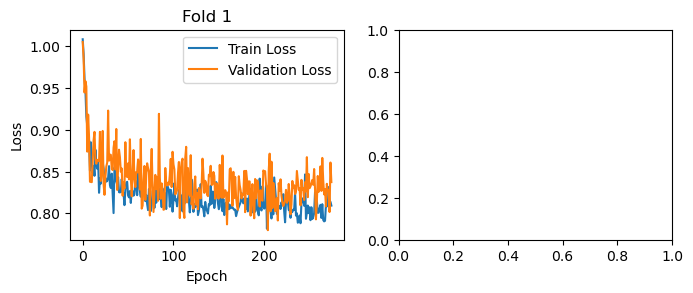

In [47]:
# print all losses for each fold on different subplots
plt.figure(figsize=(12, 6))
for i in range(N_FOLDS):
    plt.subplot(2, 3, i + 1)
    plt.plot(all_train_losses[i], label='Train Loss')
    plt.plot(all_val_losses[i], label='Validation Loss')
    plt.title(f'Fold {i + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
plt.tight_layout()
plt.show()


## Testing

In [ ]:
tennis_test_dataset = TennisMatchDataset([
                                            'past-stuttgart-atp-singles',
                                            'past-hertogenbosch-atp-singles',
                                          ])
nb_errors = 0
list_vectors_test = []
list_labels_test = []
list_matches_ids_test = []

list_vectors_test, list_labels_test, list_matches_ids_test, nb_errors = tennis_test_dataset.get_past_vectors()


print(f'Number of errors : {nb_errors} over {len(tennis_test_dataset.get_matches_ids())} matches')

print(f'Number of vectors : {len(list_vectors_test)}')
input_shapes = []
for i in range(len(list_vectors_test[0])):
    input_shapes.append(len(list_vectors_test[0][i]))
print(f'Input shapes : {input_shapes}')

# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors
new_list_vectors_test = []
new_list_labels_test = []
new_list_matches_ids_test = []

for i in tqdm(range(len(list_vectors_test))) :
    vector = list_vectors_test[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels_test[i] != c.PADDING:
        new_list_vectors_test.append(vector)
        new_list_labels_test.append(list_labels_test[i])
        new_list_matches_ids_test.append(list_matches_ids_test[i])
print(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors_test)}')

tournament_features_vector_test = []
player1_features_vector_test = []
player2_features_vector_test = []
h2h_overall_vector_test = []
h2h_surface_vector_test = []
shape_overall_player1_vector_test = []
shape_overall_player2_vector_test = []

for vector in new_list_vectors_test:
    tournament_features_vector_test.append(vector[0])
    player1_features_vector_test.append(vector[1])
    player2_features_vector_test.append(vector[2])
    h2h_overall_vector_test.append(vector[3])
    h2h_surface_vector_test.append(vector[4])
    shape_overall_player1_vector_test.append(vector[5])
    shape_overall_player2_vector_test.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor_test = torch.tensor(tournament_features_vector_test, dtype=torch.float)
tournament_features_mask_test = torch.zeros_like(tournament_features_tensor_test)
tournament_features_mask_test[tournament_features_tensor_test != c.PADDING] = 1.
player1_features_tensor_test = torch.tensor(player1_features_vector_test, dtype=torch.float)
player1_features_mask_test = torch.zeros_like(player1_features_tensor_test)
player1_features_mask_test[player1_features_tensor_test != c.PADDING] = 1.
player2_features_tensor_test = torch.tensor(player2_features_vector_test, dtype=torch.float)
player2_features_mask_test = torch.zeros_like(player2_features_tensor_test)
player2_features_mask_test[player2_features_tensor_test != c.PADDING] = 1.
h2h_overall_tensor_test = torch.tensor(h2h_overall_vector_test, dtype=torch.float)
h2h_overall_mask_test = torch.zeros_like(h2h_overall_tensor_test)
h2h_overall_mask_test[h2h_overall_tensor_test != c.PADDING] = 1.
h2h_surface_tensor_test = torch.tensor(h2h_surface_vector_test, dtype=torch.float)
h2h_surface_mask_test = torch.zeros_like(h2h_surface_tensor_test)
h2h_surface_mask_test[h2h_surface_tensor_test != c.PADDING] = 1.
shape_overall_player1_tensor_test = torch.tensor(shape_overall_player1_vector_test, dtype=torch.float)
shape_overall_player1_mask_test = torch.zeros_like(shape_overall_player1_tensor_test)
shape_overall_player1_mask_test[shape_overall_player1_tensor_test != c.PADDING] = 1.
shape_overall_player2_tensor_test = torch.tensor(shape_overall_player2_vector_test, dtype=torch.float)
shape_overall_player2_mask_test = torch.zeros_like(shape_overall_player2_tensor_test)
shape_overall_player2_mask_test[shape_overall_player2_tensor_test != c.PADDING] = 1.

label_vector = []
for label in new_list_labels_test:
    label_vector.append(label)

label_tensor_test = torch.tensor(label_vector)

test_dataset = TensorDataset(tournament_features_tensor_test, 
                             tournament_features_mask_test, 
                             player1_features_tensor_test, 
                             player1_features_mask_test, 
                             player2_features_tensor_test, 
                             player2_features_mask_test,
                             h2h_overall_tensor_test, 
                             h2h_overall_mask_test, 
                             h2h_surface_tensor_test, 
                             h2h_surface_mask_test, 
                             shape_overall_player1_tensor_test, 
                             shape_overall_player1_mask_test, 
                             shape_overall_player2_tensor_test, 
                             shape_overall_player2_mask_test, 
                             label_tensor_test)

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

all_predictions = []
for j in range(N_FOLDS):
    model = TennisMatchPredictor(input_shapes)
    model.load_state_dict(torch.load(f'{c2.REPO_PATH}/tennis/models/best_model_fold_{j + 1}.pth'))
    model.eval()
    predictions = []
    with torch.no_grad():
        test_loss = 0.0
        for i, data in enumerate(test_dataloader):
            tournament_features, tournament_mask, player1_features, player1_mask, player2_features, player2_mask, h2h_overall, h2h_overall_mask, h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, shape_overall_player2, shape_overall_player2_mask, labels = data
            outputs = model(tournament_features = tournament_features, 
                            player1_features = player1_features, 
                            player2_features = player2_features, 
                            h2h_overall = h2h_overall, 
                            h2h_surface = h2h_surface, 
                            shape_overall_player1 = shape_overall_player1, 
                            shape_overall_player2 = shape_overall_player2,
                            tournament_mask = tournament_mask, 
                            player1_mask = player1_mask, 
                            player2_mask = player2_mask, 
                            h2h_overall_mask = h2h_overall_mask,
                            h2h_surface_mask = h2h_surface_mask,
                            shape_overall_player1_mask = shape_overall_player1_mask,
                            shape_overall_player2_mask = shape_overall_player2_mask
                            )    
            predictions.append(outputs)        
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
        print(f'Test Loss: for {j+1} : {test_loss/len(test_dataloader):.2f}')
    # find the matches where the model is the most confident and was right
    predictions = torch.cat(predictions).flatten()
    all_predictions.append(predictions)

all_predictions = torch.stack(all_predictions)
predictions = all_predictions.mean(dim=0)

# get the indexes of the matches where the model was right
# create data frame with the predictions and the labels and the match ids
df = pd.DataFrame(columns=['match_id', 'predictions', 'labels'])
df['predictions'] = predictions
df['labels'] = label_tensor_test
df['match_id'] = new_list_matches_ids_test
# order the data frame by predictions values
df = df.sort_values(by='predictions', ascending=False)

# fetch the odds of betclic for the matches
odds_1_list = []
odds_2_list = []
prob_list = []
for match_id in df['match_id']:
    match_odds =tennis_test_dataset.get_match(match_id).get_odds()
    odds_found = False
    for match_odd in match_odds:
        if match_odd['bookmaker'] == 'Betclic.fr':
            odds_found = True
            odds_1_list.append(float(match_odd['odds'][0]))
            odds_2_list.append(float(match_odd['odds'][1]))
            player1odd = float(match_odd['odds'][0])
            player2odd = float(match_odd['odds'][1])
            prob_win_player1 = 1/player1odd
            prob_win_player2 = 1/player2odd
            # normalize the probabilities
            prob_sum = prob_win_player1 + prob_win_player2
            prob_win_player1 = prob_win_player1/prob_sum
            prob_win_player2 = prob_win_player2/prob_sum
            prob_list.append(2*prob_win_player1-1)
            break
    if not odds_found:
        odds_1_list.append(None)
        odds_2_list.append(None)
        prob_list.append(None) 

df['odds_1'] = odds_1_list
df['odds_2'] = odds_2_list
df['bookmaker_pred'] = prob_list
df = df.loc[df['odds_1'].notnull()]

Loading data for tournaments {'past-hertogenbosch-atp-singles', 'past-stuttgart-atp-singles'} ...
... loaded 78 matches
Updating id table ...
... id table updated


100%|██████████| 2/2 [00:00<00:00, 51.11it/s]

Error 'g0a0' for match Oh6c4ESH in tournament past-hertogenbosch-atp-singles
Error 'g0a0' for match WYuCTZFk in tournament past-hertogenbosch-atp-singles
Error 'c0jt' for match Am1pF1lS in tournament past-hertogenbosch-atp-singles
Error 'h0eq' for match hEehX6PO in tournament past-hertogenbosch-atp-singles
Error 'g0a0' for match IJwypHBE in tournament past-hertogenbosch-atp-singles
Error 'n0dd' for match reW1aBTi in tournament past-stuttgart-atp-singles
Error 'g0gz' for match Q14yykQa in tournament past-stuttgart-atp-singles
Number of errors : 7 over 78 matches
Number of vectors : 71
Input shapes : [2, 40, 40, 4, 4, 15, 15]


  0%|          | 0/71 [00:00<?, ?it/s]

Number of vectors after removing vectors with too much missing values : 66
Test Loss: for 1 : 0.69
Test Loss: for 2 : 0.47
Test Loss: for 3 : 0.75
Test Loss: for 4 : 0.63
Test Loss: for 5 : 0.93


/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


## Betting

In [ ]:
CONFIDENCE_THRESHLOLD = 0.5


# Kelly criterion
def kelly_criterion(odds, prob, safe=0.1):
    return (prob - (1- prob)/(odds))*safe

bet_on_player_1_df = df.loc[df['predictions'] > CONFIDENCE_THRESHLOLD].copy()
bet_on_player_1_df['prediction_prob']= bet_on_player_1_df['predictions'].apply(lambda x : (1+x)/2)
bet_on_player_1_df['kelly_criterion'] = bet_on_player_1_df.apply(lambda row : kelly_criterion(row['odds_1'], row['prediction_prob']), axis=1)
bet_on_player_2_df = df.loc[df['predictions'] < -CONFIDENCE_THRESHLOLD].copy()
bet_on_player_2_df['prediction_prob']= bet_on_player_2_df['predictions'].apply(lambda x : (1-x)/2)
bet_on_player_2_df['kelly_criterion'] = bet_on_player_2_df.apply(lambda row : kelly_criterion(row['odds_2'], row['prediction_prob']), axis=1)
bet_on_player_2_df = bet_on_player_2_df.sort_values(by='predictions', ascending=True)

# Strategy results : bet the proportion given by the kelly criterion on each match
INIT_AMOUNT = 100 # euros
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'
# bet on player 1
total_amount = INIT_AMOUNT
for i, row in bet_on_player_1_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == 1:
        total_amount += amout_to_bet*(row['odds_1']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1, ({row['prediction_prob']:.2f}) amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1, ({row['prediction_prob']:.2f}) amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    

# bet on player 2
for i, row in bet_on_player_2_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == -1:
        total_amount += amout_to_bet*(row['odds_2']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2, ({row['prediction_prob']:.2f}) amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2, ({row['prediction_prob']:.2f}) amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")



print(f"\nTotal amount after betting : {total_amount:.2f}")
if total_amount > INIT_AMOUNT:
    print(f"{GREEN}Relative won {(total_amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-total_amount)/INIT_AMOUNT*100:.2f}%{RESET}")

Match : xjDq4CcK Griekspoor T. - McDonald M., bet on player 1, (0.80) amount to bet : 6.49, odds : 1.33, label : 1.00, total amount : 102.14
Match : COBghUGb De Minaur A. - Bergs Z., bet on player 1, (0.79) amount to bet : 6.18, odds : 1.12, label : 1.00, total amount : 102.88
Match : j5cd4pTq Humbert U. - Brouwer G., bet on player 1, (0.79) amount to bet : 6.40, odds : 1.29, label : 1.00, total amount : 104.74
Match : On3pYZan Berrettini M. - Duckworth J., bet on player 1, (0.77) amount to bet : 5.98, odds : 1.17, label : 1.00, total amount : 105.76
Match : nctXlgGr De Minaur A. - Raonic M., bet on player 1, (0.75) amount to bet : 6.01, odds : 1.31, label : 1.00, total amount : 107.62

Total amount after betting : 107.62
Relative won 7.62%
